# D213: Advanced Data Analytics - Task 1
***

### By: Leng Yang
### Student ID: 012298452
### Date: October 18, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Research Question](#A1)
* [A2. Objectives or Goals](#A2)
* [B. Summary of Assumptions](#B)
* [C1. Line Graph Visualization](#C1)
* [C2. Time Step Formatting](#C2)
* [C3. Stationarity](#C3)
* [C4. Steps to Prepare the Data](#C4)
* [C5. Prepared Data Set](#C5)
* [D1. Report Findings and Visualizations](#D1)
* [D2. ARIMA Model](#D2)
* [D3. Forecasting Using ARIMA Model](#D3)
* [D4. Output and Calculations](#D4)
* [D5. Code](#D5)
* [E1. Results](#E1)
* [E2. Annotated Visualization](#E2)
* [E3. Recommendation](#E3)
* [F. Reporting](#F)
* [G. Sources for Third-Party Code](#G)
* [H. Sources](#H)

<BR>

<BR>

<BR>

<BR>

## A1. Research Question <a class="anchor" id="A1"></a>

Can revenue be forecasted for the next quarter based on the historical data?

<BR>

## A2. Objectives or Goals <a class="anchor" id="A2"></a>

This analysis aims to forecast revenue for an upcoming quarter in the fiscal year. Forecasting revenue is relevant to the business as it aids in planning budgets, allocating resources, evaluating performance, and more. Furthermore, it may lead to insights into the rising cost of care and any related underlying causes.

<BR>

## B. Summary of Assumptions <a class="anchor" id="B"></a>

Some assumptions are made when using an ARIMA model for time series analysis. The first of these is that the data should be stationary. That is to say that the series stays mostly the same over time or that the properties of the series should remain constant regardless of when it is captured. This would also mean that a stationary time series has a constant mean and variance over time (Sangarshanan, 2018). Another prominent assumption that needs to be checked before modeling is autocorrelation of the data. Autocorrelation is a measure of correlation between the current data and its past data points, or the data and a lagged version of itself (Built In, n.d.). This autocorrelation provides valuable information as it can aid in detecting any patterns and can improve forecasting as understanding past data can help make more accurate predictions.

<BR>

## C1. Line Graph Visualization <a class="anchor" id="C1"></a>

In [19]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Read in file to a dataframe
df = pd.read_csv('medical_time_series.csv')

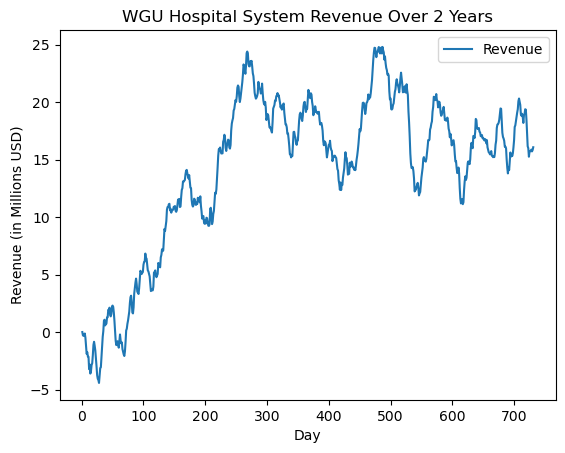

In [21]:
#Plot data
df.plot(x='Day', y='Revenue')
plt.ylabel('Revenue (in Millions USD)')
plt.title('WGU Hospital System Revenue Over 2 Years');

<BR>

## C2. Time Step Formatting <a class="anchor" id="C2"></a>

The series consists of revenue data that is captured daily over 731 days. There is no missing data, and therefore, no gaps are present within the data.

<BR>

## C3. Stationarity <a class="anchor" id="C3"></a>

The stationarity of the data can be statistically examined using an Augmented Dickey-Fuller (ADF) test. In the context of this analysis, the null hypothesis states that the data is non-stationary, whereas the alternative hypothesis presents stationary data. This test was conducted using an alpha set at 0.05. The test resulted in a statistic of -2.21 and a p-value of 0.19. With a test statistic greater than -2.86, at the 5% level, and a p-value of greater than 0.05, it can be concluded that the null hypothesis cannot be rejected. This results in a series that is not stationary.

A stationary series must be used to perform time series modeling and forecasting. This issue can be solved by differencing the data. Differencing is computed by subtracting the previous data point from the current one and is performed on the entire data set. This is done to remove trends and seasonality within the data and also helps to stabilize the mean. Running another ADF test on the differenced data results in a p-value of 5.11 x 10e-30, much less than 0.05, indicating a rejection of the null hypothesis and, thus, a stationary series.

In [28]:
#H0 - non-Stationarity Present | H1 - Stationarity Present
#Check for stationarity of original data
results = adfuller(df.Revenue)
results

(-2.2183190476089454,
 0.19966400615064356,
 1,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 842.453027617641)

In [29]:
#Difference data by one and check for stationarity
df_stationary = df.diff().dropna()
results2 = adfuller(df_stationary.Revenue)
results2

(-17.374772303557062,
 5.113206978840171e-30,
 0,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 846.2604386450553)

<BR>

## C4. Steps to Prepare the Data <a class="anchor" id="C4"></a>

An inspection of the data found no missing values or extreme outliers. The data was then prepared by transforming the `Day` variable into a `DateTime` format, with the year set in 2022, as there were no indications of such in the data dictionary. This transformation was done for ease of analysis. The only other preparation was to split the data into a training and testing set. The data was divided using an 80/20 split, which accounted for 585 days in the training set and 146 days in the testing set.

In [33]:
#Check data info and for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [34]:
#Transform original data into a datetime format and set 'Day' as index
df.Day = pd.to_datetime(df.Day, unit='D', origin=pd.Timestamp('2021-12-31'))
df.set_index('Day', inplace=True)

In [35]:
#Split data into train/test sets
train = df[:585]
test = df[585:]

In [36]:
#Check length
train.shape

(585, 1)

In [37]:
#Check length
test.shape

(146, 1)

<BR>

## C5. Prepared Data Set <a class="anchor" id="C5"></a>

The cleaned, train, and test sets are attached alongside the submission as "D213_Task1_Clean.csv," "D213_Task1_Train.csv," and "D213_Task1_Test.csv."

In [41]:
#Export cleaned and train/test sets
df.to_csv('D213_Task1_Clean.csv')
train.to_csv('D213_Task1_Train.csv')
test.to_csv('D213_Task1_Test.csv')

<BR>

## D1. Report Findings and Visualizations <a class="anchor" id="D1"></a>

* The presence or lack of a seasonal component

The seasonal component shows a pattern with constant magnitude. With a constant pattern and no apparent differences between seasons, no seasonality is present.

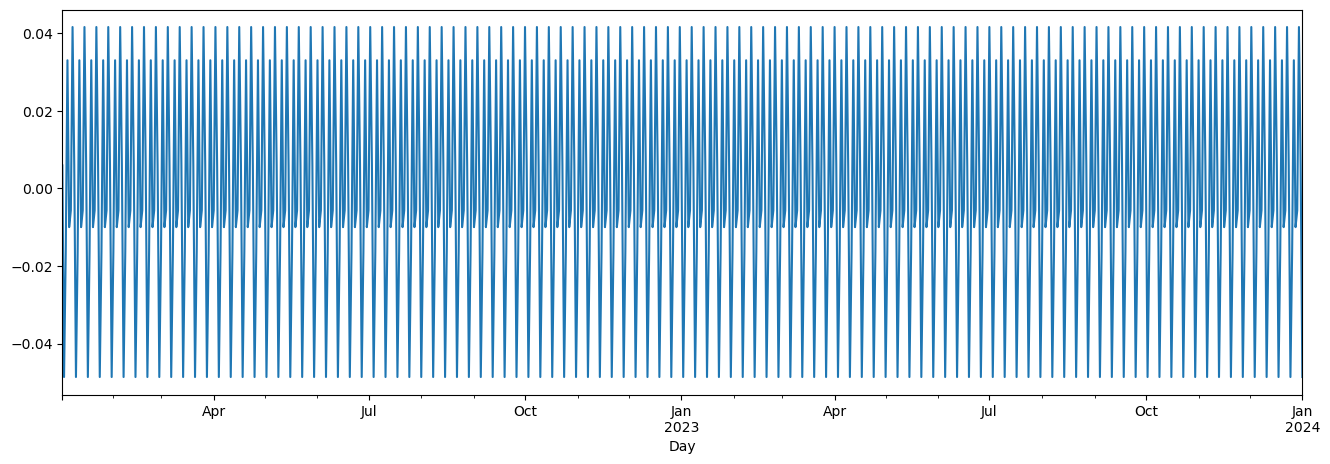

In [45]:
df_stationary = df.diff().dropna()
decomp = seasonal_decompose(df_stationary)
plt.figure(figsize=(16,5))
decomp.seasonal.plot();

* Trends

No observable trend was observed within the series. Also, the values tend to center around zero.

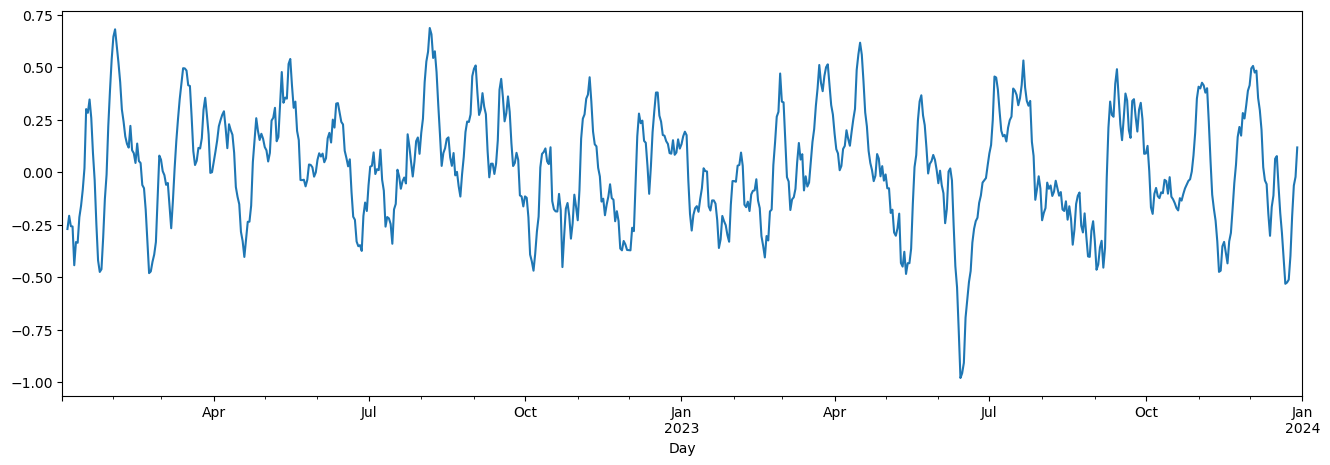

In [47]:
plt.figure(figsize=(16,5))
decomp.trend.plot();

* The Autocorrelation Function (ACF)

The plots of autocorrelation (ACF) and partial autocorrelation (PACF) are shown below. These plots can be used to determine an ARIMA model's possible `p` and `q` values. An AR(1) model is possible as the PACF plot shows a significant value at lag-1 before dropping off. Furthermore, the ACF plot is positive at lag-1 and shows a slower decay toward zero, further indicating the use of an AR model (Sangarshanan, 2018).

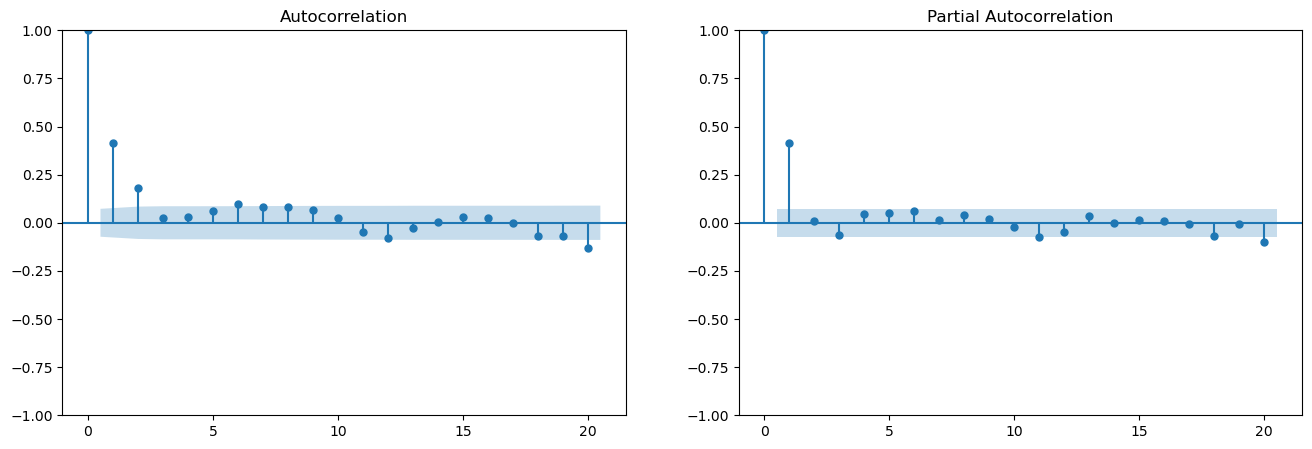

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

plot_acf(df_stationary, lags=20, ax=ax1)
plot_pacf(df_stationary, lags=20, ax=ax2);

* The Spectral Density

Some spikes are seen, but they occur at random frequencies. It can be concluded that there is no seasonality or periodicity, as the spikes arise randomly.

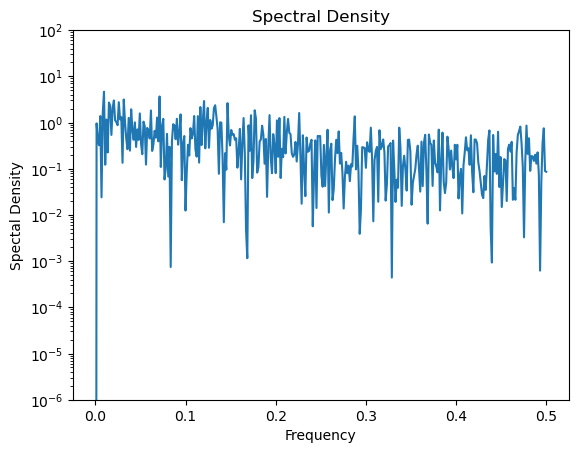

In [51]:
#Spectral Density visualization (Elleh, n.d)
from scipy import signal
f, Pxx_den = signal.periodogram(df_stationary.Revenue)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectal Density');

* The decomposed time series

Below are the visualizations of the decomposed time series. The visualizations include the observed values as well as the trend, seasonal, and residual components.

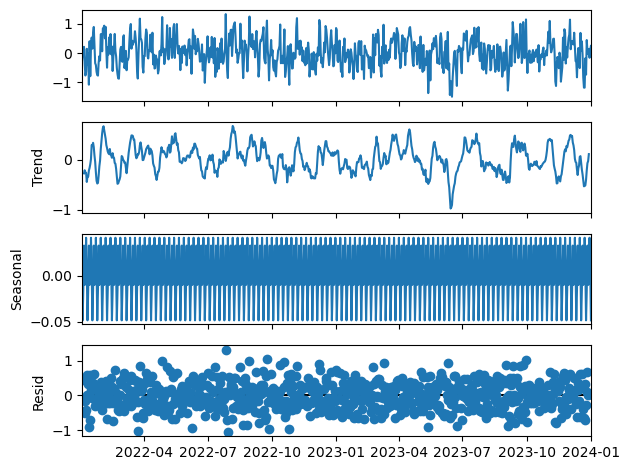

In [53]:
decomp.plot();

* Confirmation of the lack of trends in the residuals of the decomposed series

The visualization shows that the data is mainly centered around zero and that no discernable pattern or trend is present.

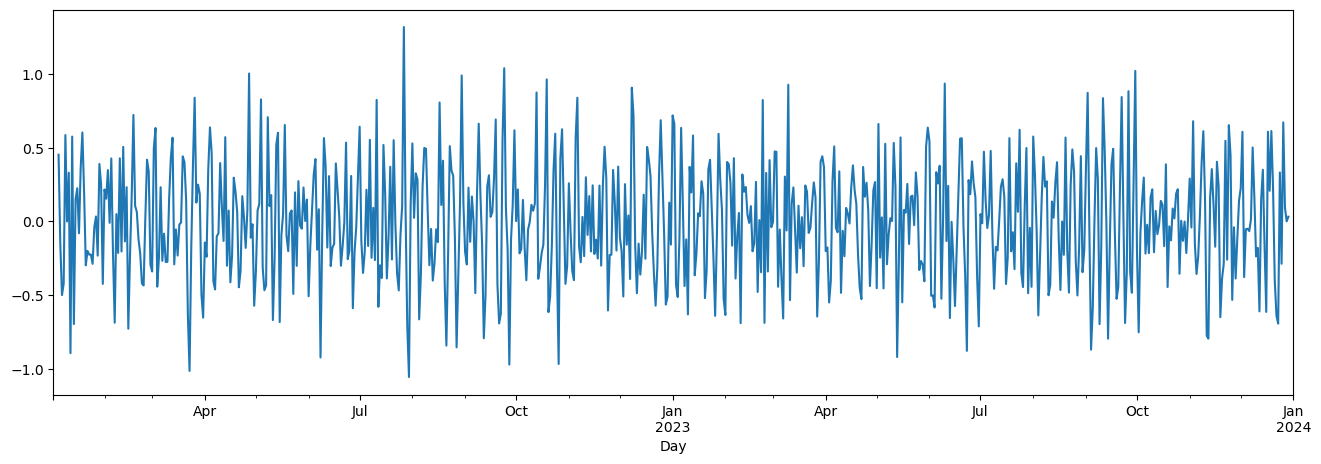

In [55]:
plt.figure(figsize=(16,5))
decomp.resid.plot();

<BR>

## D2. ARIMA Model <a class="anchor" id="D2"></a>

The `auto_arima` class was used to determine the parameters for the model with the lowest AIC score. The input used the original data, resulting in `p`, `d`, and `q`, values of 1, 1, and 0, respectively. A `d` value of 1 is reconfirmed from the earlier ADF test performed. Additionally, the results of the second parenthesis, containing (0, 0, 0), further indicate no seasonality in the data.

After running `auto_arima`, another run was performed using `ARIMA` on the extracted parameters to determine the final model results.

In [59]:
#auto_arima on orginal data to determine recommended p, d, q values
best_params = auto_arima(df, trace=True)
best_params.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=883.277, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1015.481, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=879.982, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=881.911, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=881.927, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=905.166, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=881.947, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.348 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -437.991
Date:                Tue, 15 Oct 2024   AIC                            879.982
Time:                        18:44:01   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
#Run recommended p, d, q values into new ARIMA model
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  585
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -350.914
Date:                Tue, 15 Oct 2024   AIC                            705.828
Time:                        18:44:01   BIC                            714.568
Sample:                    01-01-2022   HQIC                           709.234
                         - 08-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4106      0.038     10.856      0.000       0.337       0.485
sigma2         0.1947      0.012     15.923      0.000       0.171       0.219
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.70   Prob(JB):                         0.41
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

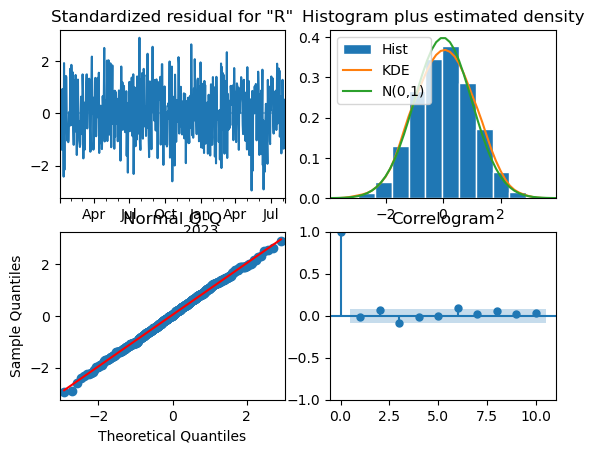

In [61]:
model_fit.plot_diagnostics();

<BR>

## D3. Forecasting Using ARIMA Model <a class="anchor" id="D3"></a>

In [64]:
#Get forecast of data up to the last day of the test set and 90 days after. Also get confidence interval values.
forecast = model_fit.get_forecast(steps=test.shape[0]+90)
mf = forecast.predicted_mean
ci = forecast.conf_int()
lower = ci.loc[:, 'lower Revenue']
upper = ci.loc[:, 'upper Revenue']

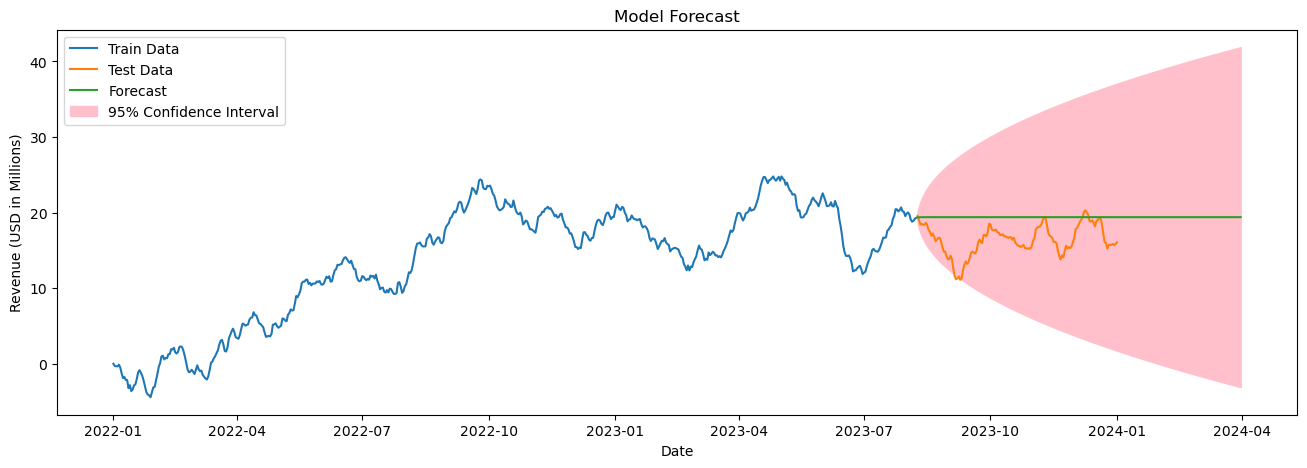

In [122]:
#Model Forecast Visualization
plt.figure(figsize=(16,5))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(mf, label='Forecast')
plt.fill_between(ci.index, lower, upper, color='pink', label='95% Confidence Interval')
plt.title('Model Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue (USD in Millions)')
plt.legend();

<BR>

## D4. Output and Calculations <a class="anchor" id="D4"></a>

Below are the forecast values and also the values of the lower and upper limit of the confidence interval of the forecast. Forecast predictions seem to increase by a small amount before tapering off.

The root mean squared error (RMSE) was calculated to determine the efficacy of the model. When comparing the test data to the forecasted data of the same length, the values were, on average, off by a value of $3.59 million. In context, this value is not the best as this is a large error to be off by.

In [69]:
#Forecast values
mf

2023-08-09    19.364739
2023-08-10    19.386095
2023-08-11    19.394864
2023-08-12    19.398465
2023-08-13    19.399944
                ...    
2024-03-27    19.400975
2024-03-28    19.400975
2024-03-29    19.400975
2024-03-30    19.400975
2024-03-31    19.400975
Freq: D, Name: predicted_mean, Length: 236, dtype: float64

In [70]:
#Confidence interval values
ci

,lower Revenue,upper Revenue
2023-08-09,18.499979,20.229500
2023-08-10,17.890807,20.881383
2023-08-11,17.369775,21.419954
2023-08-12,16.921929,21.875002
2023-08-13,16.530069,22.269820
...,...,...
2024-03-27,-2.890686,41.692635
2024-03-28,-2.938924,41.740873
2024-03-29,-2.987058,41.789007
2024-03-30,-3.035089,41.837038


In [71]:
#Model evaluation metric
pred = model_fit.forecast(steps=test.shape[0])
root_mean_squared_error(test, pred)

3.591837558392631

<BR>

## D5. Code <a class="anchor" id="D5"></a>

A copy of the code is also submitted alongside the report as "D213_Task_1_LY.ipynb."

<BR>

## E1. Results <a class="anchor" id="E1"></a>

The parameters of the ARIMA model were selected based on the `auto_arima` results of the data set, which would produce a model with the lowest AIC score. The auto_arima model also did not detect any seasonality. Furthermore, ACF and PACF plots and ADF tests were also used to determine possible parameter values. The values of these separate methods were similar to those that resulted from auto_arima. The final ARIMA model consisted of `p`, `d`, and `q` values of 1, 1, and 0, respectively.

The prediction interval consisted of daily revenue predictions. The forecasts included the entire length of the test set and an additional 90 days to forecast a quarter of a fiscal year. This totaled to 236 predictions.

The model contained data that amounted to close to two year's worth of data, as the data was split before modeling. Since the data points were not sufficiently large, a longer forecast length would amount to wildly inaccurate results, so a shorter forecast length was used. This is further implicated by the forecast's confidence interval, which grew very wide as predictions strayed further from the training data.

The best model was evaluated using AIC scores. Using `auto_arima`, multiple models were run with differing parameters, and the model with the lowest AIC score was chosen. Furthermore, the error metric to determine the final model's efficacy was RMSE. The error value resulted at 3.59. In the context of revenue, this error value is too high as it represents millions of dollars. An error as large as this could have significant impacts on business decisions.

<BR>

## E2. Annotated Visualization <a class="anchor" id="E2"></a>

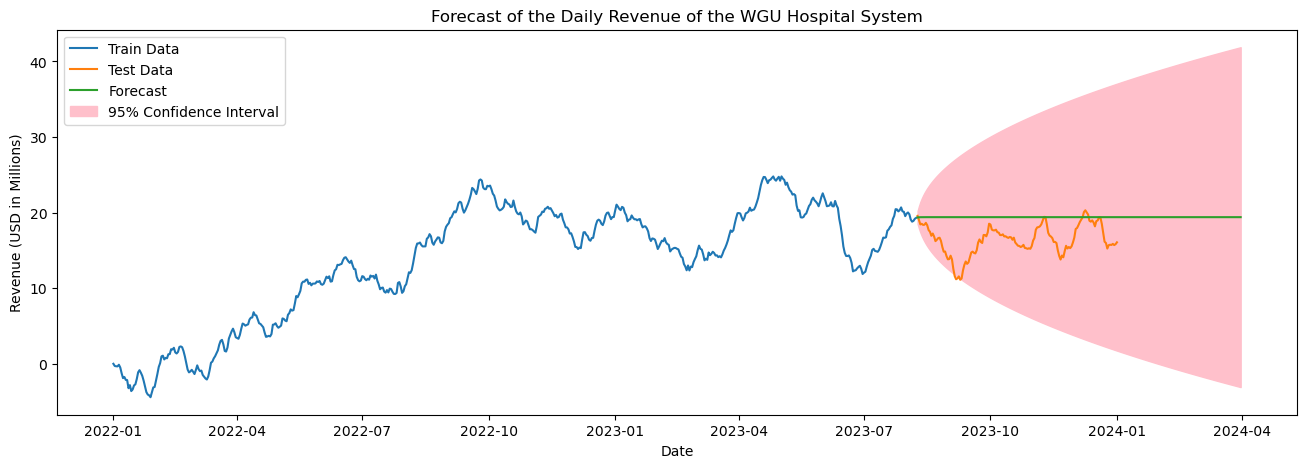

In [120]:
#Model Forecast Visualization
plt.figure(figsize=(16,5))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(mf, label='Forecast')
plt.fill_between(ci.index, lower, upper, color='pink', label='95% Confidence Interval')
plt.title('Forecast of the Daily Revenue of the WGU Hospital System')
plt.xlabel('Date')
plt.ylabel('Revenue (USD in Millions)')
plt.legend();

<BR>

## E3. Recommendation <a class="anchor" id="E3"></a>

Based on the results of the analysis, this model holds little practical significance. This can be seen from the visualization, in which the forecasted values generally overestimated revenue and the vast confidence interval. With the small sample of data that the model could train on, it is recommended that more data be collected for more accurate analysis. Lastly, another time series model could be used as it would produce different results and could lead to a model with practical significance.

<BR>

## F. Reporting <a class="anchor" id="F"></a>

A Jupyter Notebook of the report is submitted in its raw form as a .ipynb file and as a PDF called "D213_Task_1_LY."

<BR>

## G. Sources for Third-Party Code <a class="anchor" id="G"></a>

Elleh, F. (n.d.). _Welcome to D213 Advanced Data Analytics - Task 1_. D213 Task 1 Cohort Webinar PPT. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7BDC38E039-2BB1-4EBE-B156-F79C16334FC6%7D&file=D213%20Task%201%20Cohort%20Webinar%20PPT.pptx&action=edit&mobileredirect=true 

<BR>

## H. Sources <a class="anchor" id="H"></a>

_A Guide to Time Series Analysis in Python_. Built In. (n.d.). https://builtin.com/data-science/time-series-python 

Sangarshanan. (2018, October 3). _Time series forecasting - arima models_. Medium. https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06#:~:text=D%20%3D%20In%20an%20ARIMA%20model,time%20series%20to%20get%20stationary. 